Networkx for scp-infer / AnnData Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scp_infer as scpi
import networkx as nx
import scanpy as sc

/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Current dir:  /home/jans/Documents/Masterarbeit/code/scp-infer
['/home/jans/Documents/Masterarbeit/code/scp-infer', '/home/jans/miniconda3/envs/py-infer/lib/python312.zip', '/home/jans/miniconda3/envs/py-infer/lib/python3.12', '/home/jans/miniconda3/envs/py-infer/lib/python3.12/lib-dynload', '', '/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages', '/home/jans/Documents/Masterarbeit/code/scp-infer/algorithm_implementations']
PyTorch not installed. Please install it to use DCDI.


In [2]:
results_file = '../data/edited/Schraivogel_chr8_un-scaled_20gene.h5ad'  # the file that will store the analysis results
adata = sc.read_h5ad(results_file)

In [3]:
#1st step: extract data matrix, gene names and cell names from the AnnData object
gene_names = adata.var_names
cell_names = adata.obs_names

#print("Data matrix shape: ", df.shape)
#print("sample: ", df.iloc[0:3,0:3])
print(len(gene_names),"genes: ", [i for i in gene_names[:3]])
print(len(cell_names),"cells: ", [i for i in cell_names[:1]])

#2nd step: extract metadata from the AnnData object and exctract perturbation information
metadata = adata.obs
metadata.head()

# Look at more perturbation labels
# print(adata.obs['perturbation'].astype(str).copy()[1000:1020])

20 genes:  ['CCNE2', 'CPQ', 'CROPseq_dCas9_DS_MYC-D']
3638 cells:  ['TGATTGACAAACCTGAGAGCTATA-sample_14']


,replicate,tissue_type,cell_line,cancer,disease,celltype,organism,perturbation,perturbation_type,ncounts,...,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt,non-targeting,multiplet,control,nan,gene_pert
cell_barcode,,,,,,,,,,,,,,,,,,,,,
TGATTGACAAACCTGAGAGCTATA-sample_14,sample_14,cell_line,K562,True,chronic myelogenous leukemia,lymphoblasts,human,RIPK2,CRISPR,1247.0,...,61,1247.0,61,0.0,0.0,False,False,False,False,True
TGATTGACAAACCTGAGTCGAGTG-sample_14,sample_14,cell_line,K562,True,chronic myelogenous leukemia,lymphoblasts,human,DSCC1,CRISPR,2615.0,...,65,2615.0,65,0.0,0.0,False,False,False,False,True
TGATTGACAAACCTGCAACTTGAC-sample_14,sample_14,cell_line,K562,True,chronic myelogenous leukemia,lymphoblasts,human,OXR1,CRISPR,1445.0,...,63,1445.0,63,0.0,0.0,False,False,False,False,True
TGATTGACAAACCTGCAGTATCTG-sample_14,sample_14,cell_line,K562,True,chronic myelogenous leukemia,lymphoblasts,human,non-targeting,CRISPR,1711.0,...,72,1711.0,72,0.0,0.0,True,False,False,False,False
TGATTGACAAACCTGCATGCAATC-sample_14,sample_14,cell_line,K562,True,chronic myelogenous leukemia,lymphoblasts,human,STK3,CRISPR,974.0,...,60,974.0,60,0.0,0.0,False,False,False,False,True


Converting data to GIES format
Intervention List created:  11 unique perturbations


1921  gene perturbations
11  interventions
Intervention list:  [[], [0], [1], [12], [13], [14], [15], [16], [17], [18], [19]]

Data matrix:
Length of data matrix:  11
Minimum length:  92.0
Maximum length:  1717.0
Average length:  330.72727272727275
Total Samples:  3638.0
Total interventional Samples:  1921.0
Entries per Intervention:  [1717.  228.  194.   92.  269.  220.  270.  203.  183.  154.  108.]
Running GIES
GIES fnished
estimate shape:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

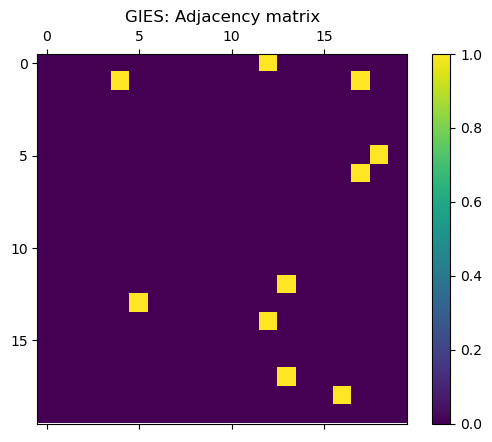

In [4]:
run_GIES = True
if run_GIES:
    gies_imp = scpi.inference.gies.GIESImp(adata, verbose= True)
    gies_imp.convert_data(singularized=False)
    gies_matrix = gies_imp.infer(plot=True)
    scpi.eval.plot_adjacency_matrix(gies_matrix, title="GIES")

In [5]:
adjacency_matrix = gies_matrix
network_graph = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
transitive_closure = nx.transitive_closure(network_graph)
gene_names = adata.var_names

In [6]:
for parent in network_graph.nodes():
    for child in network_graph.successors(parent):
        print(gene_names[parent], " -> ", gene_names[child])

CCNE2  ->  DSCC1
CPQ  ->  CROPseq_dCas9_DS_chr8:103825887-103826486_26_-
CPQ  ->  RIPK2
CROPseq_dCas9_DS_chr8:110605403-110605739_5_-  ->  STK3
CROPseq_dCas9_DS_chr8:124463057-124463653_32_-  ->  RIPK2
DSCC1  ->  FAM83A
FAM83A  ->  CROPseq_dCas9_DS_chr8:110605403-110605739_5_-
LRRCC1  ->  DSCC1
RIPK2  ->  FAM83A
STK3  ->  PHF20L1


Graph evaluation

In [7]:
tp, fp, wasserstein_distances = scpi.eval.evaluate_wasserstein(adata, gies_matrix)
print("True positives: ", tp)
print("False positives: ", fp)
print("Mean Wasserstein distance: ", np.mean(wasserstein_distances))

parent:  0
parent:  1
parent:  2
parent:  3
parent:  4
parent:  5
parent:  6


parent:  7
parent:  8
parent:  9
parent:  10
parent:  11
parent:  12
parent:  13
parent:  14
parent:  15
parent:  16
parent:  17
parent:  18
parent:  19
True positives:  5
False positives:  3
Mean Wasserstein distance:  0.15070104626204617


In [8]:
false_omisson_rate, negative_mean_wasserstein = scpi.eval.evaluate_f_o_r(adata, gies_matrix)
print("False omission rate: ", false_omisson_rate)
print("Negative mean Wasserstein distance: ", negative_mean_wasserstein)

unrelated_adj_matrix:  [[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

parent:  1
parent:  2
parent:  3
parent:  4
parent:  5
parent:  6
parent:  7
parent:  8
parent:  9
parent:  10
parent:  11
parent:  12
parent:  13
parent:  14
parent:  15
parent:  16
parent:  17
parent:  18
parent:  19
False omission rate:  0.2956521739130435
Negative mean Wasserstein distance:  0.09681507715840759
